In [3]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

h_data = pd.read_csv('HDHI Admission data.csv')

In [4]:
# EDA

# null values identification
h_data.head(5)

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [78]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SNO                              15757 non-null  int64         
 1   MRD No.                          15757 non-null  object        
 2   D.O.A                            15757 non-null  datetime64[ns]
 3   D.O.D                            15757 non-null  object        
 4   AGE                              15757 non-null  int64         
 5   GENDER                           15757 non-null  object        
 6   RURAL                            15757 non-null  object        
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object        
 8   month year                       15757 non-null  object        
 9   DURATION OF STAY                 15757 non-null  int64         
 10  duration of intensive unit stay  15757 non-null  int64    

In [6]:
nul_val = h_data.isnull().sum()

In [7]:
nul_val

,0
SNO,0
MRD No.,0
D.O.A,0
D.O.D,0
AGE,0
GENDER,0
RURAL,0
TYPE OF ADMISSION-EMERGENCY/OPD,0
month year,0
DURATION OF STAY,0


In [8]:

#  What is the total number of admissions?

total_admission = len(h_data)

print(f'Total no of addmissions: {total_admission}')

Total no of addmissions: 15757


In [9]:
# 2. What is the distribution of gender among admitted patients?

# NO MISSING VALUES IN GENDER SO DIRECTLY COUNTING IT
genders = h_data.groupby('GENDER').size()
print(genders)

GENDER
F    5767
M    9990
dtype: int64


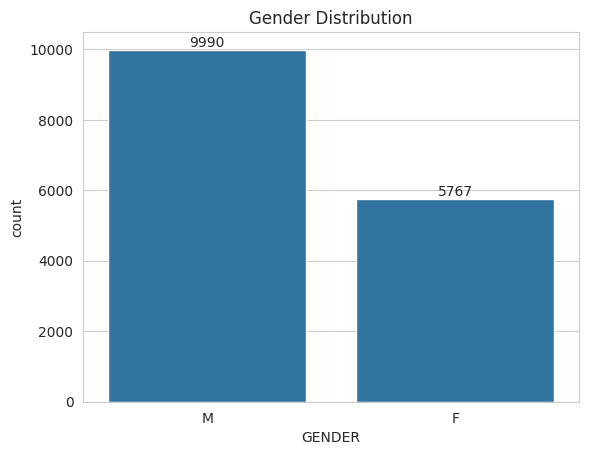

In [10]:
sns.set_style('whitegrid')
plot = sns.countplot(x='GENDER',data=h_data)
plot.bar_label(plot.containers[0])
plot.set_title("Gender Distribution")
plt.show()

In [11]:
# Which age group is most frequently admitted?

gage = h_data.groupby('AGE')
gage.size().sort_values(ascending=False).head()

,0
AGE,
65,912
60,884
70,769
55,640
62,603


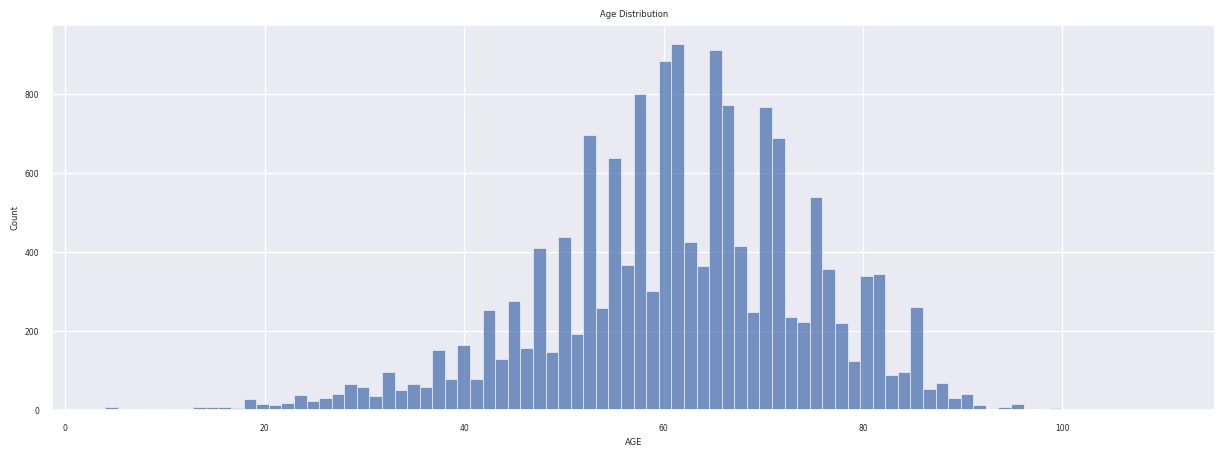

In [69]:
plot = sns.histplot(x='AGE',data=h_data)
plot.set_title("Age Distribution")
plot.figure.set_size_inches(15,5)
plt.rcParams.update({'xtick.labelsize': 6})
plt.show()

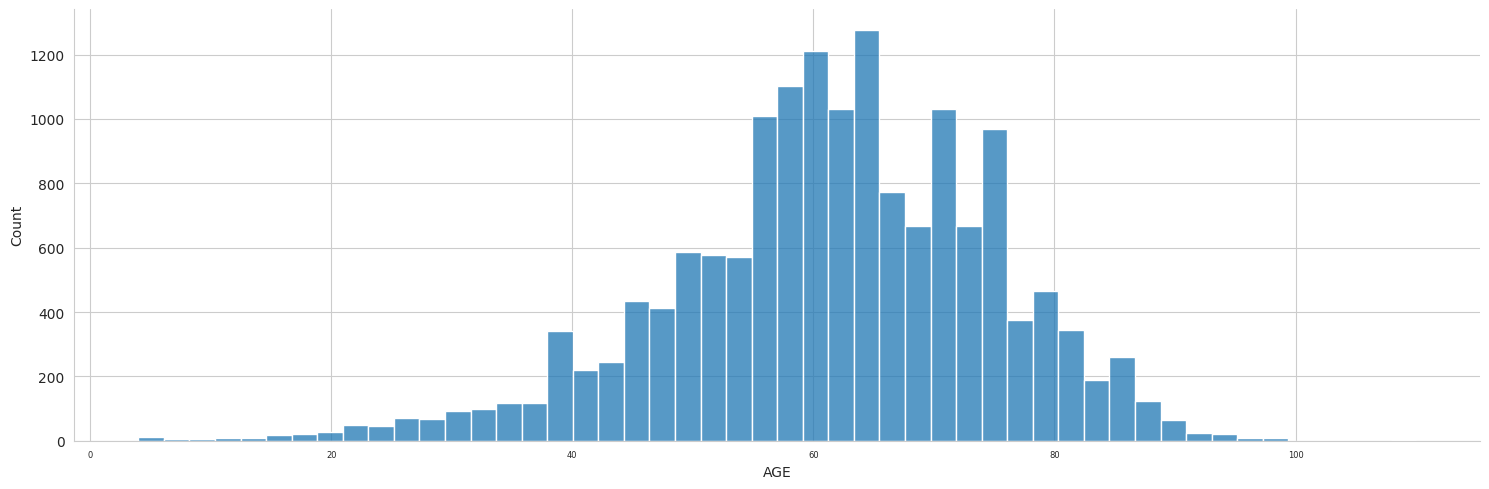

In [13]:
# Shows frequently admitted patiends are from 55 to 75 years old
distribution = sns.displot(data=h_data,x='AGE',aspect=3,bins=50)

In [14]:
# What are the most common admission types?

group_admission = h_data.groupby('TYPE OF ADMISSION-EMERGENCY/OPD')
group_admission_sorted = group_admission.size().sort_values(ascending=False)
group_admission_sorted

,0
TYPE OF ADMISSION-EMERGENCY/OPD,
E,10924
O,4833


[Text(0, 0, '10924'), Text(0, 0, '4833')]

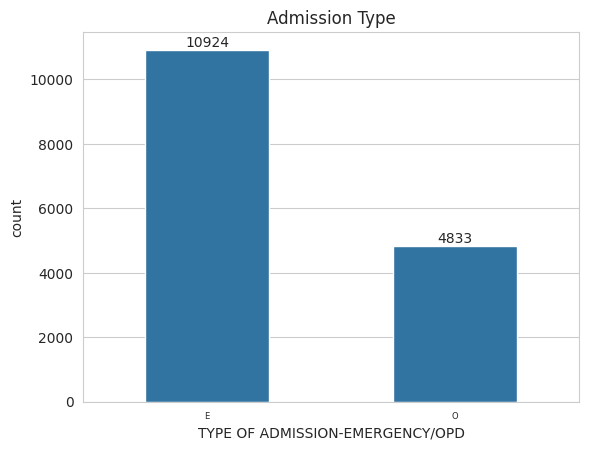

In [15]:
# The plot shows that emergeny admission is almost double of that of OPD admission
admission_bar = sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD',data=h_data,width=0.5)
admission_bar.set_title("Admission Type")
admission_bar.bar_label(admission_bar.containers[0])

In [18]:
# from datetime import datetime as dt

# converts date of addmission given in string to python datetime instead of
# def convertToDatetime(item):

#   doa = [int(x) for x in item.split('/')]

#   if doa[0] > 12:
#   date = dt(int(doa[2]),int(doa[1]),int(doa[0]))
#   else:
#     date = dt(int(doa[2]),int(doa[0]),int(doa[1]))

#   return date.strftime('%A')

In [19]:
# Q) On which day of the week do most patients get admitted?

# first convert date of addmission to pandas Timestamp object &
# Make a day column in data

h_data['D.O.A'] = pd.to_datetime(h_data['D.O.A'],format='mixed')
h_data['Day'] = [x.day_name() for x in h_data['D.O.A']]

In [20]:
groupby_day = h_data.groupby('Day').size()
groupby_day

,0
Day,
Friday,2275
Monday,2548
Saturday,2123
Sunday,1852
Thursday,2319
Tuesday,2421
Wednesday,2219


<Axes: xlabel='Day', ylabel='count'>

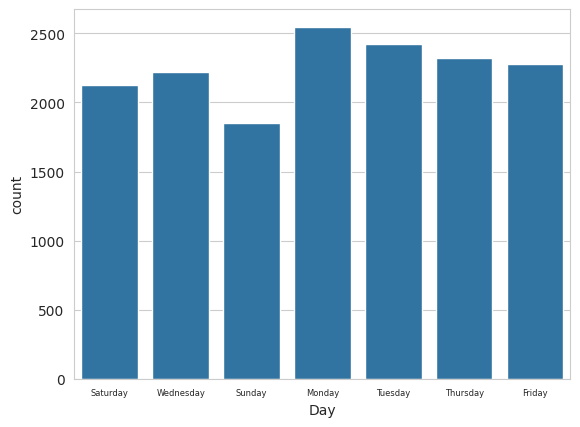

In [21]:
# Plot shows most patients got admitted on monday but there is no as such big difference
sns.countplot(x='Day',data=h_data)

In [22]:
# What percentage of patients have visited before (previous_visits > 0)?

# To check if a person has visited before we can use the medical record department no (MRD No)
# from the data it looks like each patient is assigned a unique mrd no if patient visits again record will have it
# more than 15k admissions but only 12244 mrd some have visited again(mrd no does not have missing/null values)

unique = len(h_data['MRD No.'].unique())
unique

12244

([<matplotlib.patches.Wedge at 0x7ba389e34c10>,
 [Text(0.18606727530399833, 1.0841489607341541, 'Visted twice or more'),
  Text(-0.18606705128405088, -1.0841489991815971, 'Visited once')],
 [Text(0.10149124107490817, 0.5913539785822658, '44.6%'),
  Text(-0.10149111888220956, -0.5913539995535984, '55.4%')])

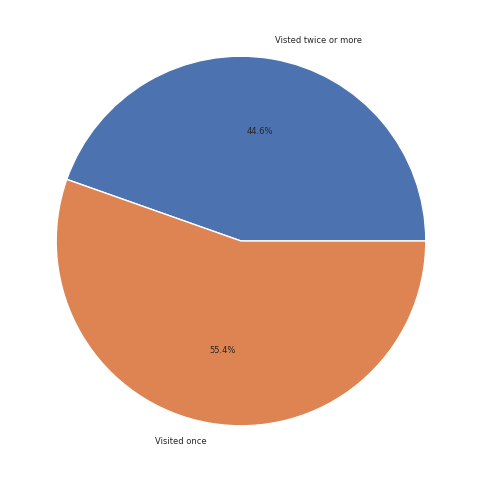

In [91]:
# we can subtract unique mrds from total toget number of patients who have visited before
total_patients = len(h_data)
visited = total_patients-unique
not_visited = total_patients-(visited*2)
percent_visited = ((visited*2)/total_patients)*100
percent_notvisited = (not_visited/total_patients)*100

plt.figure(figsize=(6, 6))
plt.pie([percent_visited,percent_notvisited],labels=['Visted twice or more','Visited once'],autopct='%1.1f%%')

In [24]:
# Is there a difference in admission types across genders?

# Grouping the data it seems that both male and female admitted in emergency
# is aprox double of that admitted in opd (See plot below for visualization)

admission_gender_group  = group_admission['GENDER'].value_counts()
admission_gender_group

TYPE OF ADMISSION-EMERGENCY/OPD  GENDER
E                                M         6869
                                 F         4055
O                                M         3121
                                 F         1712
Name: count, dtype: int64

<Axes: xlabel='TYPE OF ADMISSION-EMERGENCY/OPD', ylabel='count'>

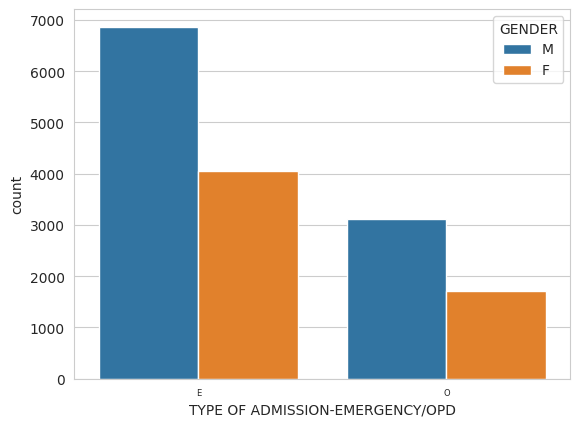

In [25]:
sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD',hue='GENDER',data=h_data)

58


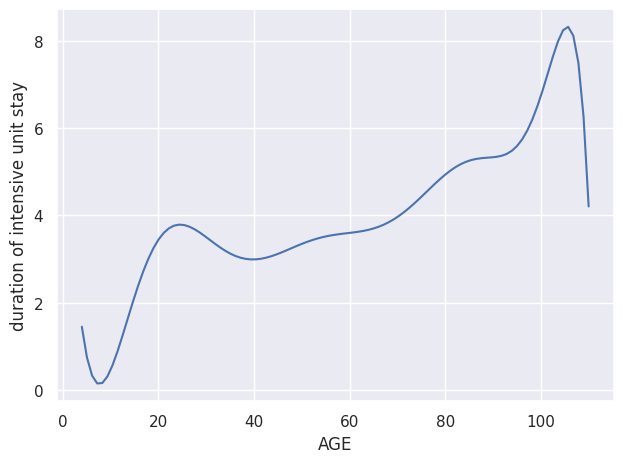

In [26]:
# Create 3 visualizations to represent interesting patterns in the data.
# used seaborn object api here
# Plot shows that as expected older people required more intensive care then younger generation
# PLOT 1
print(h_data['duration of intensive unit stay'].max())
obj = so.Plot(h_data,x='AGE',y='duration of intensive unit stay').add(so.Line(), so.PolyFit(order=10))
obj.show()

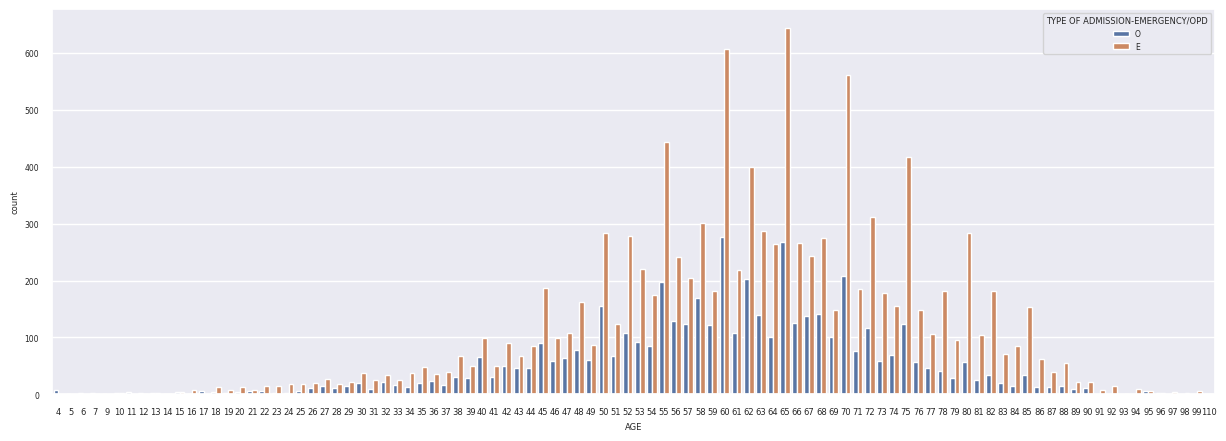

In [76]:
# PLOT 2
admission_group = h_data.groupby('TYPE OF ADMISSION-EMERGENCY/OPD')
admission_count = sns.countplot(data=h_data,x='AGE',hue='TYPE OF ADMISSION-EMERGENCY/OPD',gap=0)
admission_count.figure.set_size_inches(15,5)

////// **For each age, number or people admitted in emergency are double. the hospital should provide more facility in that area** ////

<Axes: xlabel='Month', ylabel='Count'>

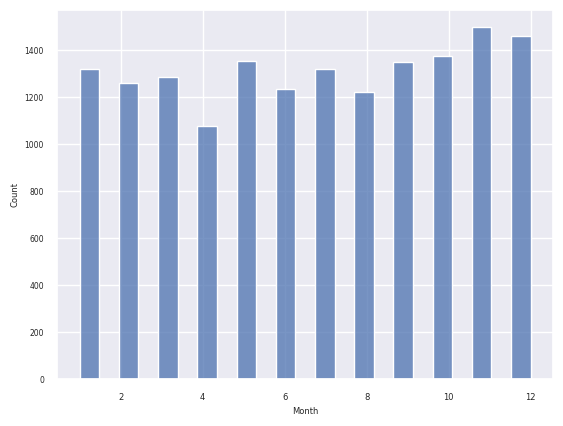

In [75]:
# Risisng number of admissions at the end of the year
h_data['Month'] = [x.month for x in h_data['D.O.A']]
sns.histplot(data=h_data,x='Month')